In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
import collections
from essential_generators import DocumentGenerator
import re
import random
from pycipher import SimpleSubstitution
from pycipher import ColTrans
from pycipher import Caesar

In [54]:
# Preprocessing // Generate Data
gen = DocumentGenerator()

# Generate Key for Simple Sub
def generateKeySimpleSub():
    keyList = []
    
    #Shuffle alphabet
    keyInts = list(range(0, 26))
    random.shuffle(keyInts)
    
    alpha = 'a'
    for i in range(0, 26):
        alpha = chr(ord(alpha) + keyInts[i])
        keyList.append(alpha)
        alpha = 'a'
    return ''.join(map(str, keyList))

# Generate Plain Text
def generatePlainTextList():
    textList = []
    
    for i in range(10000):
        #Generate random sentence and remove unncessary chars
        sentence = gen.sentence()
        sentence = re.sub(r'[^A-Za-z ]+', '', sentence)
        textList.append(sentence)
        
    return textList

In [55]:
# Generate Encrypted SimpleSub Cipher Text

#Simple Sub using one text
def simplesubOneText(plainTextList):
    #Create plain text list and output list
    #plainTextList = generatePlainTextList()
    encrpytList = []
    
    for i in range(len(plainTextList)):
        #Generate Key
        key = generateKeySimpleSub()

        #Encrypt
        ss = SimpleSubstitution(key)
        cipher = ss.encipher(plainTextList[0])
        encrpytList.append(cipher)
    
    return encrpytList

#Simple Sub using one key
def simplesubOneKey(plainTextList):
    #Create plain text list and output list
    #plainTextList = generatePlainTextList()
    encrpytList = []
    
    #Generate Key
    key = generateKeySimpleSub()
    
    for i in plainTextList:
        #Encrypt
        ss = SimpleSubstitution(key)
        cipher = ss.encipher(i)
        encrpytList.append(cipher)
        
    return encrpytList

In [56]:
# Generate Encrypted Col Transpose Cipher Text
def colTransposeOneText(plainTextList):
    #Create plain text list and output list
    #plainTextList = generatePlainTextList()
    encrpytList = []
    
    for i in range(len(plainTextList)):
        #Generate Key
        key = gen.word()
        
        #Encrypt
        ct = ColTrans(key)
        cipher = ct.encipher(plainTextList[0])
        encrpytList.append(cipher)
        
    return encrpytList
    
def colTransposeOneKey(plainTextList):
    #Create plain text list and output list
    #plainTextList = generatePlainTextList()
    encrpytList = []
    
    #Generate key
    key = gen.word()
    
    for i in plainTextList:
        #Encrpyt
        ct = ColTrans(key)
        cipher = ct.encipher(i)
        encrpytList.append(cipher)
    
    return encrpytList

In [62]:
# Generate Encrpyt AutoKey Cipher Text
def caesarOneText(plainTextList):
    #Create plain text list and output list
    #plainTextList = generatePlainTextList()
    encrpytList = []
    
    for i in range(len(plainTextList)):
        #Generate Key
        key = random.randint(0,15)
        
        #Encrypt
        ck = Caesar(key)
        cipher = ck.encipher(plainTextList[0])
        encrpytList.append(cipher)
        
    return encrpytList
    
    
def caesarOneKey(plainTextList):
    #Create plain text list and output list
    #plainTextList = generatePlainTextList()
    encrpytList = []
    
    #Generate key
    key = random.randint(0,15)
    
    for i in plainTextList:
        #Encrpyt
        ck = Caesar(key)
        cipher = ck.encipher(i)
        encrpytList.append(cipher)
    
    return encrpytList

In [66]:
# Testing Functions
simpleSubKey = generateKeySimpleSub()
print("Simple Sub Key:", simpleSubKey)
print("------------------------------------------------------")
plainText = generatePlainTextList()
print("Plain Text List:", plainText[:5])
print("------------------------------------------------------")
SS_oneText = simplesubOneText(plainText)
print("Simple Sub One Text:", SS_oneText[:5])
print("------------------------------------------------------")
plainText = generatePlainTextList()
SS_oneKey = simplesubOneKey(plainText)
print("Simple Sub One Key:", SS_oneKey[:5])
print("------------------------------------------------------")
plainText = generatePlainTextList()
CT_oneText = colTransposeOneText(plainText)
print("Col Tranpose One Text:", CT_oneText[:5])
print("------------------------------------------------------")
plainText = generatePlainTextList()
CT_oneKey = colTransposeOneKey(plainText)
print("Col Tranpose One Key:", CT_oneKey[:5])
print("------------------------------------------------------")
plainText = generatePlainTextList()
Caesar_oneText = caesarOneText(plainText)
print("Caesar One Text:", Caesar_oneText[:5])
print("------------------------------------------------------")
plainText = generatePlainTextList()
Caesar_oneKey = caesarOneKey(plainText)
print("Caesar One Key:", Caesar_oneKey[:5])

Simple Sub Key: yaquiorhvkszxdjlewcmpbgtfn
------------------------------------------------------
Plain Text List: ['Industry emerged H habilis and H ergaster  with   and ', 'Wilderness List race studies AsianAmerican and Latinoa or Chicanoa studies In recent years cruise', 'Crime of Maruli in his writings would have done extensive work on the', 'Nations railroad G countries Since privatisation', 'Than predicted Horst Albert and']
------------------------------------------------------
Simple Sub One Text: ['RCIMAFVOQYQVNQIZZJBRXRAJCIZQVNJAFQVERFZJCI', 'SJDXQYZNTATZMTDBBUISGSQUJDBTZMUQYTZPSYBUJD', 'HIJCZLEXBYBESBJOOFUHRHZFIJOBESFZLBENHLOFIJ', 'AZSFULQGXJXQDXSNNRIAOAURZSNXQDRULXQVALNRZS', 'EAZKGTCFBVBCMBZDDRNEUEGRAZDBCMRGTBCXETDRAZ']
------------------------------------------------------
Simple Sub One Key: ['TSYVHNTJNCZGGHFHLVKNQJXWCJWSNLQSLTSWYGKTSIZUTSALVKN', 'ZYWCGWATJQGGHQIIUKNNKISKLRWUXYQJXKLNCUWELVKTUKIZJQLTWSQSILVKQTUYWUL', 'IKYKSIKIWSTLNJWEYWNTLTWSTNSKQUGHNLQASQSL', 'LWWYLTJQGQI

In [ ]:
# Calculate Index of Coincidence
def indexOfCoincidence(string):
    denominator = len(string) * (len(string) - 1)
    
    #Find number of occurances per char
    alphabetList = np.zeros(26)
    for char in string:
        index = ord(char) - 65
        alphabetList[index] += 1
    
    #Calculate entropy
    summation = 0.0
    for i in range(26):
        numerator = alphabetList[i] * (alphabetList[i] - 1)
        if denominator == 0:
            summation += 0
        else: 
            summation += numerator / denominator

    return summation * 100

# Calculate Shannon Entropy
def shannon_entropy(string):
    bases = collections.Counter([tmp_base for tmp_base in string])
    # define distribution
    dist = [x/sum(bases.values()) for x in bases.values()]
 
    # use scipy to calculate entropy
    entropy_value = entropy(dist, base=2)
 
    return entropy_value

# Compute Purits
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [71]:
def IOC_Entropy_List(Cipher_list, num):
    IOC_Entropy_list = []
    
    for i in Cipher_list:
        ioc_entropy = []
        ioc_entropy.append(indexOfCoincidence(i))
        ioc_entropy.append(shannon_entropy(i))
        ioc_entropy.append(num)
        IOC_Entropy_list.append(ioc_entropy)
        
    return IOC_Entropy_list

In [67]:
SS_IOC_Entropy_oneText = IOC_Entropy_List(SS_oneText)
print("Simple Sub One Text:",SS_IOC_Entropy_oneText[:5])    

print("------------------------------------------------------")

SS_IOC_Entropy_oneKey = IOC_Entropy_List(SS_oneKey)
print("Simple Sub One Key",SS_IOC_Entropy_oneKey[:5])     

print("------------------------------------------------------")

CT_IOC_Entropy_oneText = IOC_Entropy_List(CT_oneText)
print("Col Transpose One Text:",CT_IOC_Entropy_oneText[:5])

print("------------------------------------------------------")

CT_IOC_Entropy_oneKey = IOC_Entropy_List(CT_oneKey)
print("Col Transpose One Key",CT_IOC_Entropy_oneKey[:5])

print("------------------------------------------------------")

Caesar_IOC_Entropy_oneText = IOC_Entropy_List(Caesar_oneText)
print("Caesar One Text:",Caesar_IOC_Entropy_oneText[:5])

print("------------------------------------------------------")

Caesar_IOC_Entropy_oneKey = IOC_Entropy_List(Caesar_oneKey)
print("Caesar One Key",Caesar_IOC_Entropy_oneKey[:5])

Simple Sub One Text: [[5.807200929152148, 3.7762625898995412, 0], [5.807200929152148, 3.7762625898995412, 0], [5.807200929152147, 3.7762625898995412, 0], [5.807200929152148, 3.7762625898995412, 0], [5.807200929152147, 3.7762625898995412, 0]]
------------------------------------------------------
Simple Sub One Key [[4.941176470588235, 4.039908068124801, 0], [5.246494798733605, 4.079900198562771, 0], [6.666666666666667, 3.6464393446710166, 0], [8.10810810810811, 3.4349313821388203, 0], [6.233766233766234, 3.8785465565514454, 0]]
------------------------------------------------------
Col Transpose One Text: [[4.710144927536232, 3.7201755214643457, 0], [4.710144927536232, 3.7201755214643466, 0], [4.710144927536232, 3.7201755214643457, 0], [4.710144927536232, 3.7201755214643457, 0], [4.710144927536232, 3.7201755214643457, 0]]
------------------------------------------------------
Col Transpose One Key [[6.292517006802722, 3.82932324298533, 0], [6.342780026990552, 3.7308075910906924, 0], [6

In [68]:
def plot_Graphs(SS_list, CT_list, Caesar_list):
    #Combined List
    XYL = SS_list + CT_list + Caesar_list
    
    #Create dataframe
    df = pd.DataFrame(XYL, columns=['IOC','Entropy','Label'])
    print(df.head(2))
    print(df.tail(2))

    #Shuffle and reindex
    df = df.sample(frac=1).reset_index(drop=True)
    print(df.head(10))
    
    #Plot before clustering
    X = df['IOC'].to_numpy()
    Y = df['Entropy'].to_numpy()
    Z = df['Label'].to_numpy()
    plt.scatter(X, Y, s =25, c = 'b')
    plt.show()
    
    color_list = ['green', 'red', 'orange', 'yellow', 'blue']
    #Model
    for i in range(2,6):
        print("Clusters: ", i)
        model = KMeans(n_clusters=i).fit(df[['IOC','Entropy']])
        print("Cluster Centers")
        print(model.cluster_centers_)

        predLabels = model.predict(df[['IOC','Entropy']])

        #Plot after clustering
        plt.scatter(X, Y, s=25, c = predLabels)
        for j in range(i):
            plt.scatter(model.cluster_centers_[j][0],model.cluster_centers_[j][1], s=200, c=color_list[j], marker="X")
        plt.title("Centroids after model training")
        plt.show()

        print("Purity Score")
        true_labels = Z.tolist()
        print(purity_score(true_labels,predLabels))

        IOC   Entropy  Label
0  5.807201  3.776263      0
1  5.807201  3.776263      0
            IOC   Entropy  Label
29998  8.270677  3.588257      0
29999  8.270677  3.588257      0
        IOC   Entropy  Label
0  8.270677  3.588257      0
1  4.710145  3.720176      0
2  5.807201  3.776263      0
3  5.807201  3.776263      0
4  8.270677  3.588257      0
5  8.270677  3.588257      0
6  4.710145  3.720176      0
7  5.807201  3.776263      0
8  4.710145  3.720176      0
9  4.710145  3.720176      0


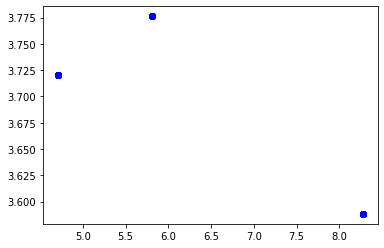

Clusters:  2
Cluster Centers
[[8.27067669 3.58825733]
 [5.25867293 3.74821906]]


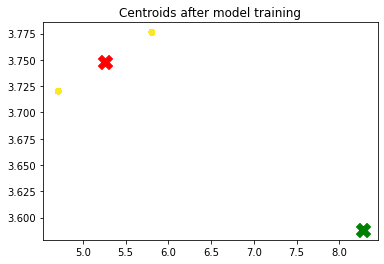

Purity Score
1.0
Clusters:  3
Cluster Centers
[[4.71014493 3.72017552]
 [8.27067669 3.58825733]
 [5.80720093 3.77626259]]


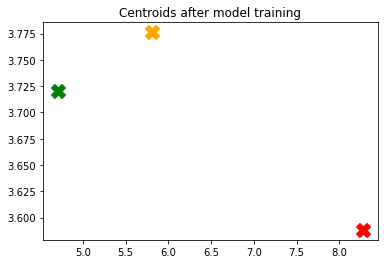

Purity Score
1.0
Clusters:  4
Cluster Centers
[[8.27067669 3.58825733]
 [5.80720093 3.77626259]
 [4.71014493 3.72017552]
 [5.80720093 3.77626259]]


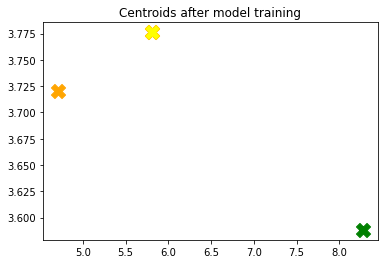

Purity Score
1.0
Clusters:  5
Cluster Centers
[[5.80720093 3.77626259]
 [8.27067669 3.58825733]
 [4.71014493 3.72017552]
 [5.80720093 3.77626259]
 [5.80720093 3.77626259]]


<ipython-input-68-735c9354454b>:25: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  model = KMeans(n_clusters=i).fit(df[['IOC','Entropy']])


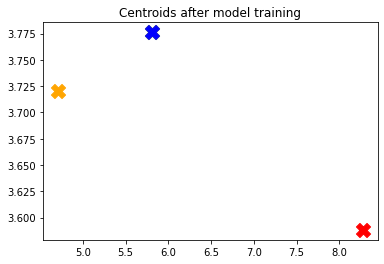

Purity Score
1.0


In [69]:
#Experiment 1: Same Text SS and CT
#Each cipher has randomized texts, i.e SS text != CT text
plot_Graphs(SS_IOC_Entropy_oneText, CT_IOC_Entropy_oneText, Caesar_IOC_Entropy_oneText)

        IOC   Entropy  Label
0  4.941176  4.039908      0
1  5.246495  4.079900      0
            IOC   Entropy  Label
29998  5.492424  3.771667      0
29999  8.677098  3.409130      0
        IOC   Entropy  Label
0  5.769231  3.883113      0
1  6.538462  3.880933      0
2  5.974026  3.898250      0
3  6.818182  3.652996      0
4  2.857143  3.820889      0
5  6.543385  3.810317      0
6  5.649123  4.049366      0
7  5.210084  3.897300      0
8  7.142857  3.485228      0
9  8.262108  3.383793      0


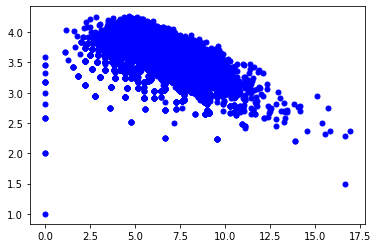

Clusters:  2
Cluster Centers
[[7.28159024 3.64925833]
 [5.50448601 3.83102683]]


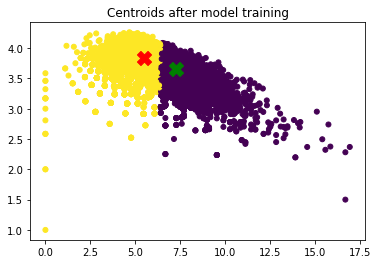

Purity Score
1.0
Clusters:  3
Cluster Centers
[[4.89345386 3.82064942]
 [8.06840198 3.50983545]
 [6.34354021 3.79659164]]


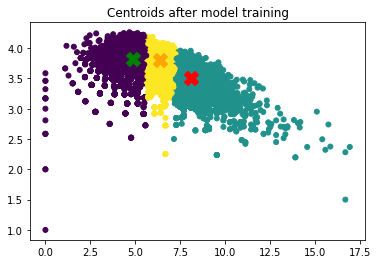

Purity Score
1.0
Clusters:  4
Cluster Centers
[[4.38524077 3.7764847 ]
 [6.96342043 3.70694528]
 [8.81055652 3.37044166]
 [5.82289567 3.8465574 ]]


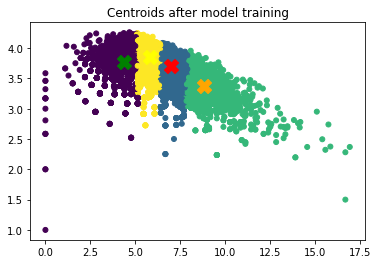

Purity Score
1.0
Clusters:  5
Cluster Centers
[[5.51592451 3.85721343]
 [6.44801338 3.78932727]
 [7.53124713 3.61328601]
 [4.12374889 3.73562421]
 [9.52440367 3.23306646]]


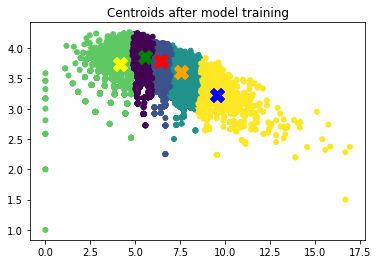

Purity Score
1.0


In [75]:
#Experiment 2: Same Key SS and CT
#Each cipher has randomized texts, i.e SS text != CT text
plot_Graphs(SS_IOC_Entropy_oneKey, CT_IOC_Entropy_oneKey, Caesar_IOC_Entropy_oneKey)

Simple Sub Experiment 3: [[7.987012987012987, 3.730502019846923, 0], [7.216494845360824, 3.9197756555699366, 0], [6.666666666666668, 3.7196618527329095, 0], [4.545454545454545, 3.957294029027326, 0], [6.015037593984962, 3.9866603572873522, 0]]
------------------------------------------------------
Col Transpose Experiment 3: [[7.987012987012989, 3.730502019846923, 1], [7.216494845360826, 3.9197756555699366, 1], [6.666666666666668, 3.7196618527329095, 1], [4.545454545454546, 3.957294029027326, 1], [6.015037593984963, 3.9866603572873522, 1]]
------------------------------------------------------
Caesar Experiment 3: [[7.987012987012989, 3.730502019846923, 2], [7.216494845360826, 3.9197756555699366, 2], [6.666666666666668, 3.7196618527329095, 2], [4.545454545454546, 3.957294029027326, 2], [6.015037593984963, 3.9866603572873522, 2]]
        IOC   Entropy  Label
0  7.987013  3.730502      0
1  7.216495  3.919776      0
            IOC   Entropy  Label
29998  7.564103  3.499582      2
29999 

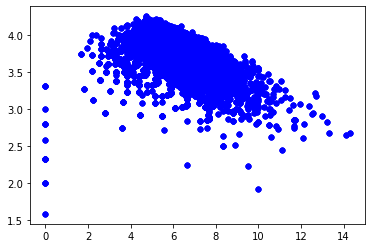

Clusters:  2
Cluster Centers
[[5.51428327 3.8351923 ]
 [7.28528666 3.64684938]]


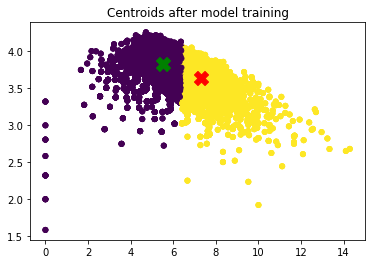

Purity Score
0.3333333333333333
Clusters:  3
Cluster Centers
[[4.94016263 3.8292612 ]
 [6.37541438 3.79525482]
 [8.07945861 3.50144387]]


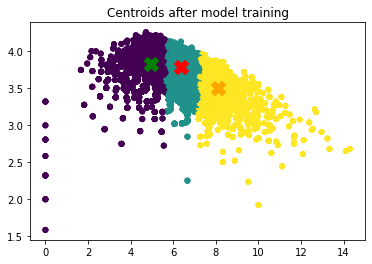

Purity Score
0.3333333333333333
Clusters:  4
Cluster Centers
[[5.78536309 3.85624856]
 [8.70259392 3.39090876]
 [4.34998149 3.77413325]
 [6.90589843 3.71284739]]


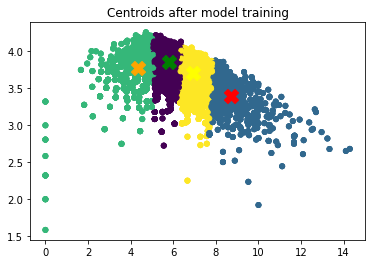

Purity Score
0.3333333333333333
Clusters:  5
Cluster Centers
[[6.47031641 3.79075861]
 [4.17499387 3.73645157]
 [7.53614828 3.60088629]
 [5.54676273 3.86375493]
 [9.50335054 3.26483306]]


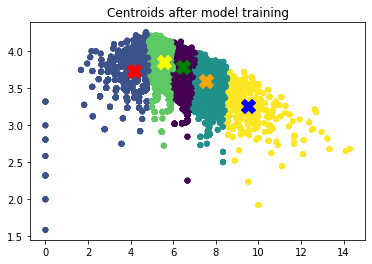

Purity Score
0.3333333333333333


In [73]:
#Experiment 3: Same Key
#Instead of randomized texts for each cipher, we use one shared list of texts

plainText = generatePlainTextList()

SS_exp3List = simplesubOneKey(plainText)
CT_exp3List = colTransposeOneKey(plainText)
Caesar_exp3List = caesarOneKey(plainText)

SS_IOC_Entropy_exp3 = IOC_Entropy_List(SS_exp3List, 0)
print("Simple Sub Experiment 3:",SS_IOC_Entropy_exp3[:5])    
print("------------------------------------------------------")
CT_IOC_Entropy_exp3 = IOC_Entropy_List(CT_exp3List, 1)
print("Col Transpose Experiment 3:",CT_IOC_Entropy_exp3[:5])
print("------------------------------------------------------")
Caesar_IOC_Entropy_exp3 = IOC_Entropy_List(Caesar_exp3List, 2)
print("Caesar Experiment 3:",Caesar_IOC_Entropy_exp3[:5])

plot_Graphs(SS_IOC_Entropy_exp3, CT_IOC_Entropy_exp3, Caesar_IOC_Entropy_exp3)

In [102]:
#For experiment 4
def simplesub2(plainTextList):
    #Create plain text list and output list
    #plainTextList = generatePlainTextList()
    encrpytList = []

    for i in plainTextList:
        #Generate Key
        key = generateKeySimpleSub()
        #Encrypt
        ss = SimpleSubstitution(key)
        cipher = ss.encipher(i)
        encrpytList.append(cipher)
        
    return encrpytList

def colTranspose2(plainTextList):
    #Create plain text list and output list
    #plainTextList = generatePlainTextList()
    encrpytList = []
    
    for i in plainTextList:
        #Generate key
        key = gen.word()
        
        #Encrpyt
        ct = ColTrans(key)
        cipher = ct.encipher(i)
        encrpytList.append(cipher)
    
    return encrpytList

def caesar2(plainTextList):
    #Create plain text list and output list
    #plainTextList = generatePlainTextList()
    encrpytList = []
    
    for i in plainTextList:
        #Generate key
        key = random.randint(0,15)
        
        #Encrpyt
        ck = Caesar(key)
        cipher = ck.encipher(i)
        encrpytList.append(cipher)
    
    return encrpytList

Simple Sub Experiment 4: [[5.593561368209256, 4.0892303960047185, 0], [6.110102843315183, 3.909091987547272, 0], [6.037000973709836, 3.9851158377077995, 0], [7.581453634085213, 3.7163075068999314, 0], [6.037414965986395, 3.8538797433500265, 0]]
------------------------------------------------------
Col Transpose Experiment 4: [[5.593561368209255, 4.089230396004719, 1], [6.110102843315183, 3.909091987547272, 1], [6.037000973709835, 3.985115837707799, 1], [7.581453634085213, 3.7163075068999314, 1], [6.037414965986395, 3.8538797433500265, 1]]
------------------------------------------------------
Caesar Experiment 4: [[5.593561368209255, 4.0892303960047185, 2], [6.110102843315183, 3.909091987547272, 2], [6.037000973709835, 3.9851158377077995, 2], [7.581453634085213, 3.7163075068999314, 2], [6.037414965986396, 3.8538797433500265, 2]]
        IOC   Entropy  Label
0  5.593561  4.089230      0
1  6.110103  3.909092      0
            IOC   Entropy  Label
29998  5.762411  3.839328      2
29999

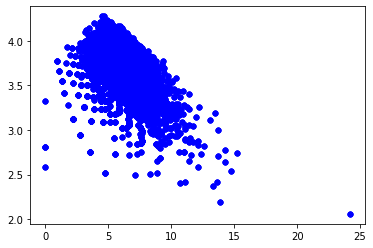

Clusters:  2
Cluster Centers
[[5.50048594 3.83356278]
 [7.29739436 3.64881434]]


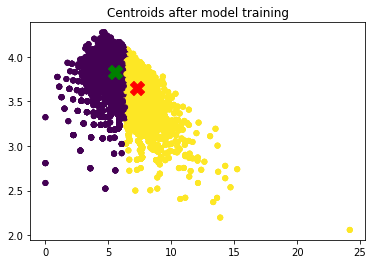

Purity Score
0.3333333333333333
Clusters:  3
Cluster Centers
[[8.0786684  3.50779728]
 [6.3436724  3.79971317]
 [4.87468279 3.82316523]]


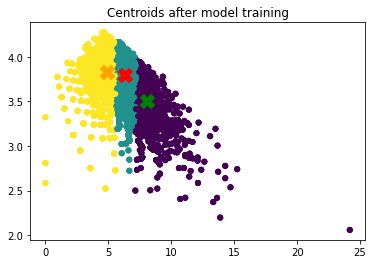

Purity Score
0.3333333333333333
Clusters:  4
Cluster Centers
[[5.8187755  3.84925785]
 [8.87902935 3.38470276]
 [6.98830077 3.70020753]
 [4.32996093 3.77680321]]


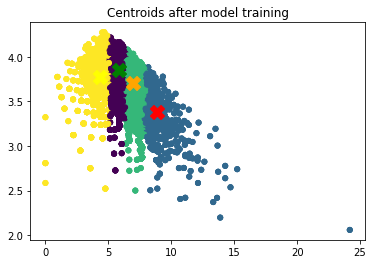

Purity Score
0.3333333333333333
Clusters:  5
Cluster Centers
[[5.52429191 3.85890901]
 [9.99555077 3.18770002]
 [6.46860072 3.79177342]
 [4.09959165 3.74393211]
 [7.61943562 3.58840572]]


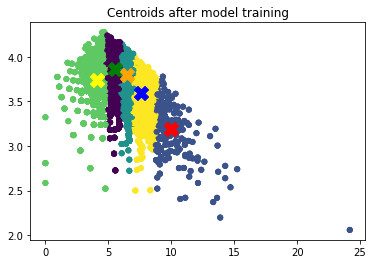

Purity Score
0.3333333333333333


In [103]:
#Experiment 4: Multi Key, Shared Text
plainText = generatePlainTextList()

SS_exp4List = simplesub2(plainText)
CT_exp4List = colTranspose2(plainText)
Caesar_exp4List = caesar2(plainText)

SS_IOC_Entropy_exp4 = IOC_Entropy_List(SS_exp4List, 0)
print("Simple Sub Experiment 4:",SS_IOC_Entropy_exp4[:5])    
print("------------------------------------------------------")
CT_IOC_Entropy_exp4 = IOC_Entropy_List(CT_exp4List, 1)
print("Col Transpose Experiment 4:",CT_IOC_Entropy_exp4[:5])
print("------------------------------------------------------")
Caesar_IOC_Entropy_exp4 = IOC_Entropy_List(Caesar_exp4List, 2)
print("Caesar Experiment 4:",Caesar_IOC_Entropy_exp4[:5])

plot_Graphs(SS_IOC_Entropy_exp4, CT_IOC_Entropy_exp4, Caesar_IOC_Entropy_exp4)

In [77]:
def IOC_Entropy_List2(Cipher_list, num):
    IOC_Entropy_list = []
    
    for i in Cipher_list:
        ioc_entropy = []
        ioc_entropy.append(indexOfCoincidence(i))
        ioc_entropy.append(shannon_entropy(i))
        ioc_entropy.append(len(i))
        ioc_entropy.append(num)
        IOC_Entropy_list.append(ioc_entropy)
        
    return IOC_Entropy_list

In [99]:
def plot_Graphs2(SS_list, CT_list, Caesar_list):
    #Combined List
    XYZL = SS_list + CT_list + Caesar_list
    
    #Create dataframe
    df = pd.DataFrame(XYZL, columns=['IOC','Entropy','Text Length','Label'])
    print(df.head(2))
    print(df.tail(2))

    #Shuffle and reindex
    df = df.sample(frac=1).reset_index(drop=True)
    print(df.head(10))
    
    #Plot before clustering
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    X = df['IOC'].to_numpy()
    Y = df['Entropy'].to_numpy()
    Z = df['Text Length'].to_numpy()
    L = df['Label'].to_numpy()
    ax.scatter(X, Y, Z, s =25, c = 'b')
    ax.set_xlabel('IOC')
    ax.set_ylabel('Entropy')
    ax.set_zlabel('Text Length')
    plt.show()
    
    color_list = ['green', 'red', 'orange', 'yellow', 'blue']
    #Model
    for i in range(2,6):
        print("Clusters: ", i)
        model = KMeans(n_clusters=i).fit(df[['IOC','Entropy', 'Text Length']])
        print("Cluster Centers")
        print(model.cluster_centers_)

        predLabels = model.predict(df[['IOC','Entropy', 'Text Length']])
        #Plot after clustering
        fig = plt.figure()
        ax2 = fig.add_subplot(111, projection='3d')
        ax2.scatter(X, Y, Z, s=25, c = predLabels)
        for j in range(i):
            ax2.scatter(model.cluster_centers_[j][0],model.cluster_centers_[j][1], model.cluster_centers_[j][2], s=50, c=color_list[j], marker="X")
        ax2.set_xlabel('IOC')
        ax2.set_ylabel('Entropy')
        ax2.set_zlabel('Text Length')
        plt.title("Centroids after model training")
        plt.show()

        print("Purity Score")
        true_labels = L.tolist()
        print(purity_score(true_labels,predLabels))

        IOC   Entropy  Text Length  Label
0  4.993252  3.904010           39      0
1  5.172414  3.667315           29      0
            IOC   Entropy  Text Length  Label
29998  4.529617  4.008056           42      2
29999  5.017007  4.015961           49      2
        IOC   Entropy  Text Length  Label
0  6.044304  3.988574           80      2
1  5.928854  3.501398           23      0
2  8.333333  3.433270           25      1
3  5.238095  3.594466           21      0
4  5.797101  3.584963           24      2
5  6.653226  3.519248           32      0
6  7.229833  3.742543           73      0
7  6.980392  3.660281           51      0
8  6.896552  3.535066           29      2
9  5.714286  3.839080           50      2


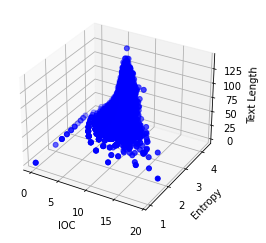

Clusters:  2
Cluster Centers
[[ 6.4202434   3.90635054 67.98216285]
 [ 6.12342157  3.63059858 32.71007771]]


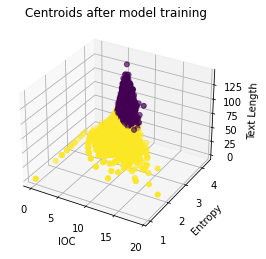

Purity Score
0.3359333333333333
Clusters:  3
Cluster Centers
[[ 6.45095032  3.93308844 75.87466462]
 [ 6.04866801  3.55672305 27.35159896]
 [ 6.33830857  3.83638489 51.26699991]]


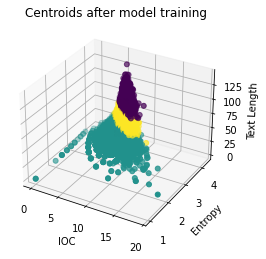

Purity Score
0.3383
Clusters:  4
Cluster Centers
[[ 6.00522603  3.51195755 24.87440243]
 [ 6.39470826  3.89459698 62.64632872]
 [ 6.28452891  3.78801113 43.92032055]
 [ 6.48223405  3.94626234 82.10347175]]


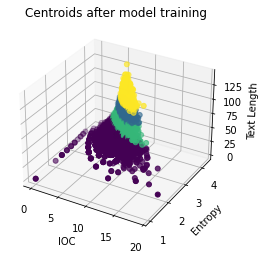

Purity Score
0.339
Clusters:  5
Cluster Centers
[[ 5.91725562  3.44198381 21.68820496]
 [ 6.41080855  3.90900341 66.51509522]
 [ 6.32830685  3.83517225 50.38016183]
 [ 6.49331084  3.95048049 84.32967033]
 [ 6.220702    3.70431914 35.31942167]]


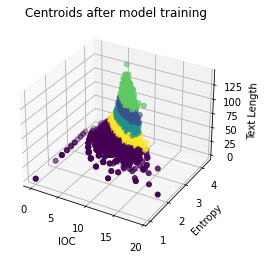

Purity Score
0.3385


In [100]:
#Experiment 5: Include length factor to experiment 2
#Generate Lists
plainText = generatePlainTextList()
SS_oneKey = simplesubOneKey(plainText)

plainText = generatePlainTextList()
CT_oneKey = colTransposeOneKey(plainText)

plainText = generatePlainTextList()
Caesar_oneKey = caesarOneKey(plainText)

#Generate dimensions
SS_IOC_Entropy_exp5 = IOC_Entropy_List2(SS_oneKey, 0) 
CT_IOC_Entropy_exp5 = IOC_Entropy_List2(CT_oneKey, 1)
Caesar_IOC_Entropy_exp5 = IOC_Entropy_List2(Caesar_oneKey, 2)

plot_Graphs2(SS_IOC_Entropy_exp5, CT_IOC_Entropy_exp5, Caesar_IOC_Entropy_exp5)

        IOC   Entropy  Text Length  Label
0  6.334842  3.839958           52      0
1  6.394231  3.929965           65      0
            IOC   Entropy  Text Length  Label
29998  5.797101  3.874121           46      2
29999  5.263158  3.446439           20      2
        IOC   Entropy  Text Length  Label
0  6.558442  3.867262           56      0
1  6.448203  3.877394           44      1
2  7.084785  3.639326           42      1
3  6.892231  3.746752           57      1
4  6.896552  3.417483           29      2
5  6.719368  3.464235           23      0
6  8.069382  3.585916           52      1
7  6.722689  3.835083           85      0
8  3.267974  3.614369           18      2
9  5.806452  3.643577           31      2


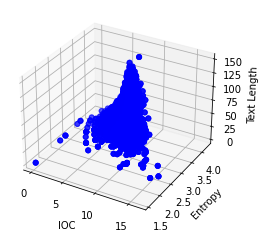

Clusters:  2
Cluster Centers
[[ 6.13167063  3.63512368 32.82957439]
 [ 6.41499563  3.90726689 68.23145269]]


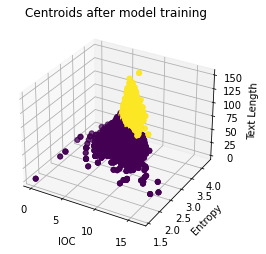

Purity Score
0.3333333333333333
Clusters:  3
Cluster Centers
[[ 6.06247081  3.56574769 27.69637306]
 [ 6.43596661  3.9346877  76.13082707]
 [ 6.34236406  3.83516384 51.22385057]]


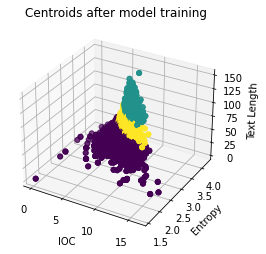

Purity Score
0.3333333333333333
Clusters:  4
Cluster Centers
[[ 6.39393     3.886739   61.1229927 ]
 [ 6.25431609  3.77154566 41.78439425]
 [ 6.00491269  3.50036318 24.17169118]
 [ 6.46748645  3.94642545 81.80284302]]


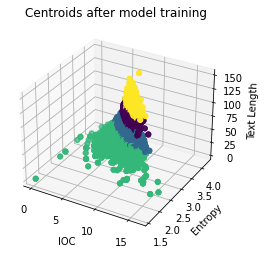

Purity Score
0.3333333333333333
Clusters:  5
Cluster Centers
[[ 6.21801184  3.73549877 37.88271861]
 [ 6.41650434  3.91939573 69.41185259]
 [ 6.35849851  3.85108388 53.47923875]
 [ 6.47234692  3.95819929 87.40489433]
 [ 5.99001001  3.47567284 23.08445946]]


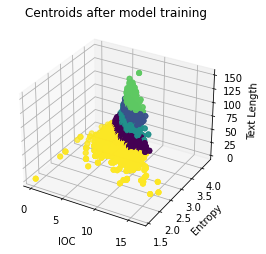

Purity Score
0.3333333333333333


In [104]:
#Experiment 6: Shared Text, Randomized Key, include length factor
#Generate Lists
plainText = generatePlainTextList()
SS_oneKey = simplesub2(plainText)
CT_oneKey = colTranspose2(plainText)
Caesar_oneKey = caesar2(plainText)

#Generate dimensions
SS_IOC_Entropy_exp6 = IOC_Entropy_List2(SS_oneKey, 0) 
CT_IOC_Entropy_exp6 = IOC_Entropy_List2(CT_oneKey, 1)
Caesar_IOC_Entropy_exp6 = IOC_Entropy_List2(Caesar_oneKey, 2)

plot_Graphs2(SS_IOC_Entropy_exp6, CT_IOC_Entropy_exp6, Caesar_IOC_Entropy_exp6)